In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from os import listdir

In [ ]:
# folder = "prepared_stock_data"
# for i, stock in enumerate(listdir(folder)):
#     try:
#         if i == 0:
#             data = pd.read_csv(folder + "//" + stock)
#         else:
#             data = data.append(pd.read_csv(folder + "//" + stock))
#     except:
#         print(i)

In [ ]:
#data.to_csv("stocks_prepared_dataset.csv")

In [2]:
data = pd.read_csv("stocks_prepared_dataset.csv").drop(["Unnamed: 0","Name"],axis=1)

In [3]:
data.head(5)

,Unnamed: 0.1,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T23,T24,T25,T26,T27,T28,T29,T30,T31,Label
0,2009-12-16,1.250608,1.247874,1.109464,1.104664,1.635328,1.627841,1.720588,1.773613,1.794562,...,1.300995,1.111872,0.991389,0.631393,0.768642,0.216305,0.093381,0.089517,0.029494,NaN
1,2009-12-17,1.208991,1.072976,1.068259,1.589744,1.582386,1.673529,1.725637,1.746224,1.849530,...,1.208991,1.104167,0.938166,0.608850,0.607427,0.172903,0.095181,0.027119,-0.023631,NaN
2,2009-12-18,1.068415,1.063709,1.584046,1.576705,1.667647,1.719640,1.740181,1.843260,1.949593,...,1.119159,1.169856,0.837893,0.609583,0.587052,0.169568,0.079762,0.010022,-0.019459,NaN
3,2009-12-21,1.026166,1.537037,1.529830,1.619118,1.670165,1.690332,1.791536,1.895935,1.948675,...,1.058960,1.083041,0.719112,0.614687,0.515745,0.130794,0.099383,-0.004472,-0.020352,NaN
4,2009-12-22,1.508547,1.501420,1.589706,1.640180,1.660121,1.760188,1.863415,1.915563,1.949749,...,1.071765,0.969799,0.636617,0.587917,0.498723,0.125240,0.100625,0.022055,-0.029217,NaN


In [4]:
START = "2017-01-01"
MIDDLE = "2019-01-01"
END = "2020-01-01"
training_data = data[(data["Unnamed: 0.1"] >= START) & (data["Unnamed: 0.1"] < MIDDLE)]
testing_data = data[(data["Unnamed: 0.1"] >= MIDDLE) & (data["Unnamed: 0.1"] < END)]
print(training_data.shape, testing_data.shape)

(247620, 33) (124695, 33)


In [5]:
training_data = training_data.dropna()
testing_data = testing_data.dropna()
print(training_data.shape, testing_data.shape)

(247510, 33) (124522, 33)


In [6]:
training_data.head(5)

,Unnamed: 0.1,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T23,T24,T25,T26,T27,T28,T29,T30,T31,Label
1773,2017-01-03,0.478361,0.468195,0.439730,0.435294,0.450900,0.432646,0.457089,0.461161,0.423966,...,0.257732,0.077285,0.016667,-0.026448,0.038003,0.077693,0.055103,-0.013401,0.005061,False
1774,2017-01-04,0.473238,0.444675,0.440224,0.455884,0.437566,0.462094,0.466180,0.428857,0.430288,...,0.241752,0.083765,0.012604,-0.016677,0.028485,0.080895,0.072060,-0.010660,-0.004183,True
1775,2017-01-05,0.460185,0.455686,0.471514,0.453000,0.477791,0.481921,0.444197,0.445644,0.439557,...,0.268440,0.092132,0.027076,-0.009718,0.060875,0.102886,0.088016,-0.043651,0.014208,True
1776,2017-01-06,0.482577,0.498697,0.479841,0.505090,0.509296,0.470876,0.472349,0.466150,0.524863,...,0.277158,0.112447,0.050367,0.002424,0.087621,0.090804,0.150909,0.043986,0.029407,True
1777,2017-01-09,0.490429,0.471677,0.496787,0.500970,0.462761,0.464226,0.458061,0.516451,0.559585,...,0.287258,0.110089,0.024725,-0.007055,0.118107,0.089096,0.135571,0.024326,0.012854,False


In [7]:
def f(x):
    if x == False:
        return 0
    return 1
columns = ["T"+str(i) for i in range(1,32)]
Y_training = training_data['Label'].apply(lambda x: f(x))
Y_testing = testing_data['Label'].apply(lambda x: f(x))

In [8]:
class TrainingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(training_data[columns].values).float()
        self.y = torch.tensor(Y_training.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    
class TestingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(testing_data[columns].values).float()
        self.y = torch.tensor(Y_testing.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [9]:
class DNN_Model1(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out=2):
        super(DNN_Model1, self).__init__()
        self.drop1 = nn.Dropout(p = 0.1)
        self.drop2 = nn.Dropout(p = 0.5)
        self.channel1_l1 = nn.Linear(D_in, H1)
        self.channel1_l2 = nn.Linear(H1, H2)
        self.channel1_l3 = nn.Linear(H2, H3)
        
        self.channel2_l1 = nn.Linear(D_in, H1)
        self.channel2_l2 = nn.Linear(H1, H2)
        self.channel2_l3 = nn.Linear(H2, H3)
        
        self.out = nn.Linear(H3, D_out)

    def forward(self, x):
        x = torch.max(self.drop1(self.channel1_l1(x)), self.drop1(self.channel2_l1(x)))
        x = torch.max(self.drop2(self.channel1_l2(x)), self.drop2(self.channel2_l2(x)))
        x = torch.max(self.drop2(self.channel1_l3(x)), self.drop2(self.channel2_l3(x)))
        x = F.softmax(self.out(x))
        return x

In [10]:
class DNN_Carlos(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out=2):
        super(DNN_Carlos, self).__init__()
        self.drop1 = nn.Dropout(p = 0.5)
        self.drop2 = nn.Dropout(p = 0.25)
        
        self.linear1_1 = nn.Linear(D_in, H1)
        torch.nn.init.kaiming_uniform_(self.linear1_1.weight, nonlinearity = "leaky_relu")
        self.linear2_1 = nn.Linear(H1, H2)
        torch.nn.init.kaiming_uniform_(self.linear2_1.weight, nonlinearity = "leaky_relu")
        self.linear3_1 = nn.Linear(H2, H3)
        torch.nn.init.kaiming_uniform_(self.linear3_1.weight, nonlinearity = "leaky_relu")
        self.linear1_2 = nn.Linear(D_in, H1)
        torch.nn.init.kaiming_uniform_(self.linear1_2.weight, nonlinearity = "leaky_relu")
        self.linear2_2 = nn.Linear(H1, H2)
        torch.nn.init.kaiming_uniform_(self.linear2_2.weight, nonlinearity = "leaky_relu")
        self.linear3_2 = nn.Linear(H2, H3)
        torch.nn.init.kaiming_uniform_(self.linear3_2.weight, nonlinearity = "leaky_relu")
        
        self.bn1 = nn.BatchNorm1d(H1)
        self.bn2 = nn.BatchNorm1d(H2)
        self.bn3 = nn.BatchNorm1d(H3)
        
        self.out = nn.Linear(H3, D_out)

    def forward(self, x):
        x = torch.max(self.bn1(self.drop1(self.linear1_1(x))), self.bn1(self.drop1(self.linear1_2(x))))
        x = torch.max(self.bn2(self.drop2(self.linear2_1(x))), self.bn2(self.drop2(self.linear2_2(x))))
        x = torch.max(self.bn3(self.linear3_1(x)), self.bn3(self.linear3_2(x)))
        x = F.softmax(self.out(x))
        return x

In [11]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    training_info = {'training_loss':[], 'validation_accuracy': []}
    MIN = 9999
    COUNTER = 0
    temp = []
    for epoch in range(epochs):
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            lambda1 = 0.00001
            all_params = torch.cat([b.view(-1) for b in model.parameters()])
            l1_regularization = lambda1 * torch.norm(all_params, 1)
            loss = criterion(y_hat,y) + l1_regularization
            loss.backward()
            optimizer.step()
            training_info['training_loss'].append(loss.data.item())
        
        if MIN == 9999 or loss.data.item() < MIN or epoch < 400:
            MIN = loss.data.item()
            COUNTER = 0
        else:
            COUNTER += 1
            
        correct = 0
        accuracy = 0
        for x, y in validation_loader:
            z = model(x)
            _, y_hat = torch.max(z,1)
            correct = (y_hat == y).sum().item()
            accuracy += correct/x.shape[0]
        training_info['validation_accuracy'].append(accuracy/len(validation_loader))
        
        if COUNTER == 5:
            print("FINISHED!!!")
            print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
            print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
            break
        
        print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
        print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
        
        

        
    return training_info

In [12]:
def trainMyModel(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    training_info = {'training_loss':[], 'validation_accuracy': []}
    MIN = 9999
    COUNTER = 0
    temp = []
    for epoch in range(epochs):
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            loss = criterion(y_hat,y)
            loss.backward()
            optimizer.step()
            training_info['training_loss'].append(loss.data.item())
            
        correct = 0
        accuracy = 0
        for x, y in validation_loader:
            z = model(x)
            _, y_hat = torch.max(z,1)
            correct = (y_hat == y).sum().item()
            accuracy += correct/x.shape[0]
        training_info['validation_accuracy'].append(accuracy/len(validation_loader))
        
        print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
        print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
        
    return training_info

In [13]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

model1 = DNN_Model1(input_dim, hidden1, hidden2, hidden3, out_dim)
#model1.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model1.parameters())

In [ ]:
training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [ ]:
model1_trainingInfo = train(model1, criterion, train_loader, validation_loader, optimizer, 500)

# 2019 trading data

## Paper's model

In [ ]:
steps = int(len(model1_trainingInfo["training_loss"])/len(model1_trainingInfo["validation_accuracy"]))
plt.plot(model1_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model1_trainingInfo["validation_accuracy"], color = "blue")

In [ ]:
path = "models//model1_2019.pth"

In [ ]:
torch.save(model1.state_dict(), path)
model1.load_state_dict(torch.load(path))
model1.eval()

## Carlos' model

In [14]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

modelCarlos = DNN_Carlos(input_dim, hidden1, hidden2, hidden3, out_dim)
#model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCarlos.parameters(), lr=1e-4)

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [15]:
model_trainingInfo = trainMyModel(modelCarlos, criterion, train_loader, validation_loader, optimizer, 400)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.6944779753684998 ACCURCY: 0.515933477222468
current epoch 1 ,  0.25 % completed
LOSS: 0.696551501750946 ACCURCY: 0.5204229668288369
current epoch 2 ,  0.5 % completed
LOSS: 0.6915575861930847 ACCURCY: 0.5255465510835914
current epoch 3 ,  0.75 % completed
LOSS: 0.6886651515960693 ACCURCY: 0.5264334506855374
current epoch 4 ,  1.0 % completed
LOSS: 0.6886106133460999 ACCURCY: 0.5290707120743035
current epoch 5 ,  1.25 % completed
LOSS: 0.692809522151947 ACCURCY: 0.5323568332596197
current epoch 6 ,  1.5 % completed
LOSS: 0.683724045753479 ACCURCY: 0.5347769942503315
current epoch 7 ,  1.75 % completed
LOSS: 0.6900166869163513 ACCURCY: 0.5341916921716056
current epoch 8 ,  2.0 % completed
LOSS: 0.6959514617919922 ACCURCY: 0.5384311154356479
current epoch 9 ,  2.25 % completed
LOSS: 0.6899647116661072 ACCURCY: 0.540888537815126
current epoch 10 ,  2.5 % completed
LOSS: 0.6902309060096741 ACCURCY: 0.5421096789031402
current epoch 11 ,  2.75 % completed
LOSS: 0.6830634474754333 ACCU

LOSS: 0.6302527785301208 ACCURCY: 0.6678534949137551
current epoch 93 ,  23.25 % completed
LOSS: 0.5931487679481506 ACCURCY: 0.6655178168951791
current epoch 94 ,  23.5 % completed
LOSS: 0.6122202277183533 ACCURCY: 0.6672311189739052
current epoch 95 ,  23.75 % completed
LOSS: 0.6263964772224426 ACCURCY: 0.6662395081822201
current epoch 96 ,  24.0 % completed
LOSS: 0.62004154920578 ACCURCY: 0.6684816559044671
current epoch 97 ,  24.25 % completed
LOSS: 0.6050337553024292 ACCURCY: 0.6677123538257409
current epoch 98 ,  24.5 % completed
LOSS: 0.5930981636047363 ACCURCY: 0.6675081928350288
current epoch 99 ,  24.75 % completed
LOSS: 0.6067746877670288 ACCURCY: 0.6664032799646177
current epoch 100 ,  25.0 % completed
LOSS: 0.6054993271827698 ACCURCY: 0.6681456559044671
current epoch 101 ,  25.25 % completed
LOSS: 0.6040242910385132 ACCURCY: 0.6690709845201238
current epoch 102 ,  25.5 % completed
LOSS: 0.6037255525588989 ACCURCY: 0.6674778841220699
current epoch 103 ,  25.75 % completed
LO

LOSS: 0.5826140642166138 ACCURCY: 0.677608166298098
current epoch 183 ,  45.75 % completed
LOSS: 0.6027217507362366 ACCURCY: 0.6782570119416188
current epoch 184 ,  46.0 % completed
LOSS: 0.5980218648910522 ACCURCY: 0.6787571729323308
current epoch 185 ,  46.25 % completed
LOSS: 0.5910559892654419 ACCURCY: 0.6794030924369748
current epoch 186 ,  46.5 % completed
LOSS: 0.6055617332458496 ACCURCY: 0.6787899513489606
current epoch 187 ,  46.75 % completed
LOSS: 0.6060870289802551 ACCURCY: 0.679115025210084
current epoch 188 ,  47.0 % completed
LOSS: 0.5886852741241455 ACCURCY: 0.6778540185758515
current epoch 189 ,  47.25 % completed
LOSS: 0.5825267434120178 ACCURCY: 0.6777833206545776
current epoch 190 ,  47.5 % completed
LOSS: 0.6086562275886536 ACCURCY: 0.6777878708536046
current epoch 191 ,  47.75 % completed
LOSS: 0.6041283011436462 ACCURCY: 0.6783463140203448
current epoch 192 ,  48.0 % completed
LOSS: 0.5933089256286621 ACCURCY: 0.6780165555064133
current epoch 193 ,  48.25 % compl

LOSS: 0.6047000885009766 ACCURCY: 0.6805454011499336
current epoch 273 ,  68.25 % completed
LOSS: 0.5956793427467346 ACCURCY: 0.6804880990712076
current epoch 274 ,  68.5 % completed
LOSS: 0.6019219160079956 ACCURCY: 0.6799660185758515
current epoch 275 ,  68.75 % completed
LOSS: 0.6074947714805603 ACCURCY: 0.6807934011499337
current epoch 276 ,  69.0 % completed
LOSS: 0.5787862539291382 ACCURCY: 0.6805366227333038
current epoch 277 ,  69.25 % completed
LOSS: 0.5835028290748596 ACCURCY: 0.6801690119416187
current epoch 278 ,  69.5 % completed
LOSS: 0.5871630311012268 ACCURCY: 0.6809471596638655
current epoch 279 ,  69.75 % completed
LOSS: 0.587467610836029 ACCURCY: 0.6807744077841662
current epoch 280 ,  70.0 % completed
LOSS: 0.5836055874824524 ACCURCY: 0.6802393206545777
current epoch 281 ,  70.25 % completed
LOSS: 0.5830278992652893 ACCURCY: 0.6804006227333039
current epoch 282 ,  70.5 % completed
LOSS: 0.6138986349105835 ACCURCY: 0.6809318708536047
current epoch 283 ,  70.75 % comp

LOSS: 0.579623818397522 ACCURCY: 0.68297070322866
current epoch 363 ,  90.75 % completed
LOSS: 0.5863930583000183 ACCURCY: 0.6810153206545776
current epoch 364 ,  91.0 % completed
LOSS: 0.5664780735969543 ACCURCY: 0.6807984750110571
current epoch 365 ,  91.25 % completed
LOSS: 0.602611780166626 ACCURCY: 0.6826620858027422
current epoch 366 ,  91.5 % completed
LOSS: 0.5922765135765076 ACCURCY: 0.6805690119416188
current epoch 367 ,  91.75 % completed
LOSS: 0.5931670069694519 ACCURCY: 0.682266314020345
current epoch 368 ,  92.0 % completed
LOSS: 0.6014897227287292 ACCURCY: 0.6797273206545776
current epoch 369 ,  92.25 % completed
LOSS: 0.5954806804656982 ACCURCY: 0.6810410791685095
current epoch 370 ,  92.5 % completed
LOSS: 0.5980209112167358 ACCURCY: 0.6802387969924812
current epoch 371 ,  92.75 % completed
LOSS: 0.5904861688613892 ACCURCY: 0.6814283945157008
current epoch 372 ,  93.0 % completed
LOSS: 0.5835344791412354 ACCURCY: 0.6813934011499337
current epoch 373 ,  93.25 % complete

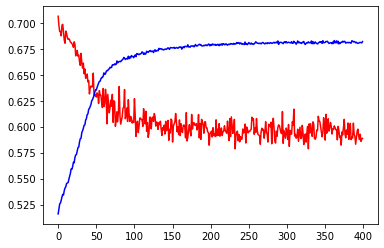

In [16]:
steps = int(len(model_trainingInfo["training_loss"])/len(model_trainingInfo["validation_accuracy"]))
plt.plot(model_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model_trainingInfo["validation_accuracy"], color = "blue")

In [17]:
path = "models//modelCarlos_2019.pth"

In [18]:
torch.save(modelCarlos.state_dict(), path)
modelCarlos.load_state_dict(torch.load(path))
modelCarlos.eval()

DNN_Carlos(
  (drop1): Dropout(p=0.5, inplace=False)
  (drop2): Dropout(p=0.25, inplace=False)
  (linear1_1): Linear(in_features=31, out_features=31, bias=True)
  (linear2_1): Linear(in_features=31, out_features=10, bias=True)
  (linear3_1): Linear(in_features=10, out_features=5, bias=True)
  (linear1_2): Linear(in_features=31, out_features=31, bias=True)
  (linear2_2): Linear(in_features=31, out_features=10, bias=True)
  (linear3_2): Linear(in_features=10, out_features=5, bias=True)
  (bn1): BatchNorm1d(31, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

# 2018 trading data

In [19]:
START = "2016-01-01"
MIDDLE = "2018-01-01"
END = "2019-01-01"
training_data = data[(data["Unnamed: 0.1"] >= START) & (data["Unnamed: 0.1"] < MIDDLE)]
testing_data = data[(data["Unnamed: 0.1"] >= MIDDLE) & (data["Unnamed: 0.1"] < END)]
print(training_data.shape, testing_data.shape)

training_data = training_data.dropna()
testing_data = testing_data.dropna()
print(training_data.shape, testing_data.shape)

(246975, 33) (123972, 33)
(246899, 33) (123906, 33)


In [20]:
Y_training = training_data['Label'].apply(lambda x: f(x))
Y_testing = testing_data['Label'].apply(lambda x: f(x))

In [21]:
class TrainingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(training_data[columns].values).float()
        self.y = torch.tensor(Y_training.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    
class TestingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(testing_data[columns].values).float()
        self.y = torch.tensor(Y_testing.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [ ]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

model1 = DNN_Model1(input_dim, hidden1, hidden2, hidden3, out_dim)
#model1.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model1.parameters())

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

## Paper's model

In [ ]:
model1_trainingInfo = train(model1, criterion, train_loader, validation_loader, optimizer, 500)

In [ ]:
steps = int(len(model1_trainingInfo["training_loss"])/len(model1_trainingInfo["validation_accuracy"]))
plt.plot(model1_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model1_trainingInfo["validation_accuracy"], color = "blue")

In [ ]:
path = "models//model1_2018.pth"
torch.save(model1.state_dict(), path)
model1.load_state_dict(torch.load(path))
model1.eval()

## Carlos' model

In [22]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

modelCarlos = DNN_Carlos(input_dim, hidden1, hidden2, hidden3, out_dim)
#model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCarlos.parameters(), lr=1e-4)

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [23]:
model_trainingInfo = trainMyModel(modelCarlos, criterion, train_loader, validation_loader, optimizer, 400)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.7116897702217102 ACCURCY: 0.5075267547363032
current epoch 1 ,  0.25 % completed
LOSS: 0.7040724158287048 ACCURCY: 0.5151229206349206
current epoch 2 ,  0.5 % completed
LOSS: 0.7155176997184753 ACCURCY: 0.518147285202253
current epoch 3 ,  0.75 % completed
LOSS: 0.7018017172813416 ACCURCY: 0.5173184557091653
current epoch 4 ,  1.0 % completed
LOSS: 0.6979820728302002 ACCURCY: 0.5217635842293907
current epoch 5 ,  1.25 % completed
LOSS: 0.6947671175003052 ACCURCY: 0.5255898248847926
current epoch 6 ,  1.5 % completed
LOSS: 0.6967142224311829 ACCURCY: 0.5297866216077828
current epoch 7 ,  1.75 % completed
LOSS: 0.6935055255889893 ACCURCY: 0.5310592852022529
current epoch 8 ,  2.0 % completed
LOSS: 0.6903125643730164 ACCURCY: 0.5358586543778803
current epoch 9 ,  2.25 % completed
LOSS: 0.6984395384788513 ACCURCY: 0.5372881146953404
current epoch 10 ,  2.5 % completed
LOSS: 0.6955699324607849 ACCURCY: 0.5386109534050179
current epoch 11 ,  2.75 % completed
LOSS: 0.6810581684112549 

LOSS: 0.6153506636619568 ACCURCY: 0.6737786830517155
current epoch 93 ,  23.25 % completed
LOSS: 0.6186676025390625 ACCURCY: 0.6736593302611368
current epoch 94 ,  23.5 % completed
LOSS: 0.6228770017623901 ACCURCY: 0.6733009400921657
current epoch 95 ,  23.75 % completed
LOSS: 0.6122326254844666 ACCURCY: 0.6738654214029698
current epoch 96 ,  24.0 % completed
LOSS: 0.6178550720214844 ACCURCY: 0.6736094050179211
current epoch 97 ,  24.25 % completed
LOSS: 0.6240091919898987 ACCURCY: 0.6749162928827446
current epoch 98 ,  24.5 % completed
LOSS: 0.592930257320404 ACCURCY: 0.6736356620583718
current epoch 99 ,  24.75 % completed
LOSS: 0.6245706677436829 ACCURCY: 0.6750283092677932
current epoch 100 ,  25.0 % completed
LOSS: 0.6245928406715393 ACCURCY: 0.6749819190988222
current epoch 101 ,  25.25 % completed
LOSS: 0.6164991855621338 ACCURCY: 0.6740302181259601
current epoch 102 ,  25.5 % completed
LOSS: 0.604153037071228 ACCURCY: 0.6753415873015873
current epoch 103 ,  25.75 % completed
LO

LOSS: 0.6084160804748535 ACCURCY: 0.6806587158218126
current epoch 183 ,  45.75 % completed
LOSS: 0.5785248875617981 ACCURCY: 0.6799035125448029
current epoch 184 ,  46.0 % completed
LOSS: 0.5846149325370789 ACCURCY: 0.6805716784434205
current epoch 185 ,  46.25 % completed
LOSS: 0.5948612093925476 ACCURCY: 0.6807214377880186
current epoch 186 ,  46.5 % completed
LOSS: 0.6009072661399841 ACCURCY: 0.6803160102406555
current epoch 187 ,  46.75 % completed
LOSS: 0.6151339411735535 ACCURCY: 0.6800273630312339
current epoch 188 ,  47.0 % completed
LOSS: 0.5968437194824219 ACCURCY: 0.680579363031234
current epoch 189 ,  47.25 % completed
LOSS: 0.5988768935203552 ACCURCY: 0.6815579190988224
current epoch 190 ,  47.5 % completed
LOSS: 0.611204981803894 ACCURCY: 0.6811121597542243
current epoch 191 ,  47.75 % completed
LOSS: 0.5956111550331116 ACCURCY: 0.6803748817204301
current epoch 192 ,  48.0 % completed
LOSS: 0.5975518226623535 ACCURCY: 0.6809851059907834
current epoch 193 ,  48.25 % compl

LOSS: 0.6075479388237 ACCURCY: 0.6819716948284689
current epoch 273 ,  68.25 % completed
LOSS: 0.5946826338768005 ACCURCY: 0.6812097695852535
current epoch 274 ,  68.5 % completed
LOSS: 0.5925993323326111 ACCURCY: 0.6819348817204304
current epoch 275 ,  68.75 % completed
LOSS: 0.5980512499809265 ACCURCY: 0.6820430476190477
current epoch 276 ,  69.0 % completed
LOSS: 0.5912654995918274 ACCURCY: 0.6827448069636456
current epoch 277 ,  69.25 % completed
LOSS: 0.6012781858444214 ACCURCY: 0.682437603686636
current epoch 278 ,  69.5 % completed
LOSS: 0.6156699657440186 ACCURCY: 0.6806411223758319
current epoch 279 ,  69.75 % completed
LOSS: 0.5968935489654541 ACCURCY: 0.6816561597542242
current epoch 280 ,  70.0 % completed
LOSS: 0.5767029523849487 ACCURCY: 0.6815985663082437
current epoch 281 ,  70.25 % completed
LOSS: 0.6231469511985779 ACCURCY: 0.6821585663082438
current epoch 282 ,  70.5 % completed
LOSS: 0.5852063894271851 ACCURCY: 0.6822059190988223
current epoch 283 ,  70.75 % complet

LOSS: 0.5777817964553833 ACCURCY: 0.6827681597542243
current epoch 363 ,  90.75 % completed
LOSS: 0.5890198945999146 ACCURCY: 0.6822452882744494
current epoch 364 ,  91.0 % completed
LOSS: 0.5989985466003418 ACCURCY: 0.682447213517665
current epoch 365 ,  91.25 % completed
LOSS: 0.605715274810791 ACCURCY: 0.6824283256528417
current epoch 366 ,  91.5 % completed
LOSS: 0.5818501114845276 ACCURCY: 0.6821518443420379
current epoch 367 ,  91.75 % completed
LOSS: 0.5802417397499084 ACCURCY: 0.682779694828469
current epoch 368 ,  92.0 % completed
LOSS: 0.599134087562561 ACCURCY: 0.6820097695852535
current epoch 369 ,  92.25 % completed
LOSS: 0.5993094444274902 ACCURCY: 0.6821064004096263
current epoch 370 ,  92.5 % completed
LOSS: 0.5755791664123535 ACCURCY: 0.6822644915514593
current epoch 371 ,  92.75 % completed
LOSS: 0.5946416258811951 ACCURCY: 0.6822744004096262
current epoch 372 ,  93.0 % completed
LOSS: 0.5951132774353027 ACCURCY: 0.6821403256528419
current epoch 373 ,  93.25 % complet

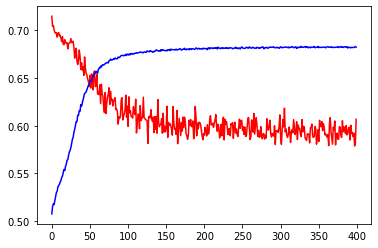

In [24]:
steps = int(len(model_trainingInfo["training_loss"])/len(model_trainingInfo["validation_accuracy"]))
plt.plot(model_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model_trainingInfo["validation_accuracy"], color = "blue")

In [25]:
path = "models//modelCarlos_2018.pth"

In [26]:
torch.save(modelCarlos.state_dict(), path)
modelCarlos.load_state_dict(torch.load(path))
modelCarlos.eval()

DNN_Carlos(
  (drop1): Dropout(p=0.5, inplace=False)
  (drop2): Dropout(p=0.25, inplace=False)
  (linear1_1): Linear(in_features=31, out_features=31, bias=True)
  (linear2_1): Linear(in_features=31, out_features=10, bias=True)
  (linear3_1): Linear(in_features=10, out_features=5, bias=True)
  (linear1_2): Linear(in_features=31, out_features=31, bias=True)
  (linear2_2): Linear(in_features=31, out_features=10, bias=True)
  (linear3_2): Linear(in_features=10, out_features=5, bias=True)
  (bn1): BatchNorm1d(31, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)